# -Bonus_C 

## Implement a text data analysis (also known as text mining) of the field "description" from instagram_posts.csv for descriptions written in English. Use appropriate visualizations and statistics to highlight the words (and probably the topics) provided for the users in that field.

For this part of code we work in local cause the 4 hour limit of AWS don't allow us to work with all the 'description' data set. 

In [1]:
import csv
import pandas as pd
import numpy as np
import re
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
from cleantext import clean
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
from collections import Counter
nltk.download('punkt')
nltk.download('words')
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/giacomo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/giacomo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /Users/giacomo/nltk_data...
[nltk_data]   Package words is already up-to-date!


We use stopwords package to detect stopwords, the stemmer and a nltk corpus of english words to detect English words: 

In [2]:
stop = stopwords.words('english')

ps = PorterStemmer()

words = set(nltk.corpus.words.words())

We define a function that do the text cleaning in 6 steps:

    -Case normalization
    -Remove Unicode Character
    -Remove emoji
    -Remove stopwords and 'numerical terms'
    -Stemming
    -Remove non English words comparing them to a nlkt corpus
    

In [3]:
def clean_text(text): 
    
    text.lower  #case normalization

    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)  #removing unicode charachters
    
    text = clean(text, no_emoji=True) #remove emoji

    text = " ".join([word for word in text.split() if word not in (stop) and word.isalpha() == True]) #removing stopwords and 'numerical term
    
    token = word_tokenize(text) #tokenization
    
    text = [ps.stem(t) for t in token if ps.stem(t) in words] #stemming and removing non english words
    
    return(" ".join(text))

Example on how it works:

In [4]:
text = "This sample 65a5svkla _ ! #text contains laughing emojis привет меня зовут джуло 😀 😃 😄 😁 😆 😅 😂 🤣"

print(clean_text(text))

text contain laugh


The nlkt corpus doesn't contain all English terms but is more efficient instead of using 'langedetect' or in general a translation method and efficiency is the key in the case u have to deal with the large datasets of description.

We decide to create a .txt file with all the 'cleaned English description':

In [ ]:
file_object = open('/Users/giacomo/Desktop/data.txt', 'a')

with open("/Users/giacomo/Desktop/instagram_posts.csv") as f:

    rows = csv.DictReader(f, delimiter = '\t')
    
    for r in rows: 
        
        if str(r['description']) != '\n' and str(r['description']) != '' and str(r['description']) != ' ':
            
           file_object.write(clean_text(str(r['description'])))


Now we can use a collection counter to count all the occurrences of the words that we found taking as input the .txt file: 

In [2]:
with open('/Users/giacomo/Desktop/data.txt', 'r') as f:
    
    contents = f.read()
    
    words = contents.split()
    
    counter_word = Counter(words)

To visualize these data we decide to use a ciruclar barplot in which we represent the first 30 most used words. First of all we sort the dictionary to take the most frequent words:

In [23]:
sorted_count = dict(sorted(counter_word.items(), key=lambda x: x[1], reverse=True))

first_words = list(sorted_count.keys())[0:30]

first_values = list(sorted_count.values())[0:30]

print(first_words)
print(first_values)

['n', 'de', 'love', 'day', 'get', 'la', 'one', 'time', 'like', 'beauti', 'e', 'new', 'make', 'go', 'year', 'thank', 'us', 'see', 'today', 'work', 'en', 'come', 'look', 'life', 'nn', 'good', 'friend', 'best', 'back', 'know', 'week', 'great', 'take', 'travel', 'last', 'feel', 'much', 'night', 'want', 'dont', 'first', 'food', 'way', 'thing', 'got', 'even', 'el', 'un', 'da', 'alway']
[2571761, 1135954, 952877, 748314, 580519, 569450, 561228, 555006, 531030, 457534, 455880, 450090, 427209, 414730, 412326, 408261, 405388, 381618, 373483, 364500, 363364, 361430, 355345, 344536, 337565, 314973, 309531, 296756, 296385, 287522, 277080, 276802, 268401, 266943, 262656, 261942, 260760, 251216, 248884, 245264, 243800, 232799, 232490, 229156, 228254, 227308, 224321, 221857, 216993, 213513]


We decide to remove single letter keys from the dictionary cause they don't have a significant meaning: 

In [24]:
keys = list(sorted_count.keys())

for k in keys: 
    
    if len(k) == 1: 
        
        sorted_count.pop(k)

In [27]:
first_words = list(sorted_count.keys())[0:30]

first_values = list(sorted_count.values())[0:30]

print(first_words)
print(first_values)

['de', 'love', 'day', 'get', 'la', 'one', 'time', 'like', 'beauti', 'new', 'make', 'go', 'year', 'thank', 'us', 'see', 'today', 'work', 'en', 'come', 'look', 'life', 'nn', 'good', 'friend', 'best', 'back', 'know', 'week', 'great']
[1135954, 952877, 748314, 580519, 569450, 561228, 555006, 531030, 457534, 450090, 427209, 414730, 412326, 408261, 405388, 381618, 373483, 364500, 363364, 361430, 355345, 344536, 337565, 314973, 309531, 296756, 296385, 287522, 277080, 276802]


We also decide to remove words like 'de', 'la', 'en', 'nn' that seems to have no meaning: 

In [33]:
no_meaning = ['de', 'la', 'en', 'nn']

for s in no_meaning:

    sorted_count.pop(s)

first_words = list(sorted_count.keys())[0:30]

first_values = list(sorted_count.values())[0:30]

print(first_words)
print(first_values)

['love', 'day', 'get', 'one', 'time', 'like', 'beauti', 'new', 'make', 'go', 'year', 'thank', 'us', 'see', 'today', 'work', 'come', 'look', 'life', 'good', 'friend', 'best', 'back', 'know', 'week', 'great', 'take', 'travel', 'last', 'feel']
[952877, 748314, 580519, 561228, 555006, 531030, 457534, 450090, 427209, 414730, 412326, 408261, 405388, 381618, 373483, 364500, 361430, 355345, 344536, 314973, 309531, 296756, 296385, 287522, 277080, 276802, 268401, 266943, 262656, 261942]


Then we plot the cirular barplot:

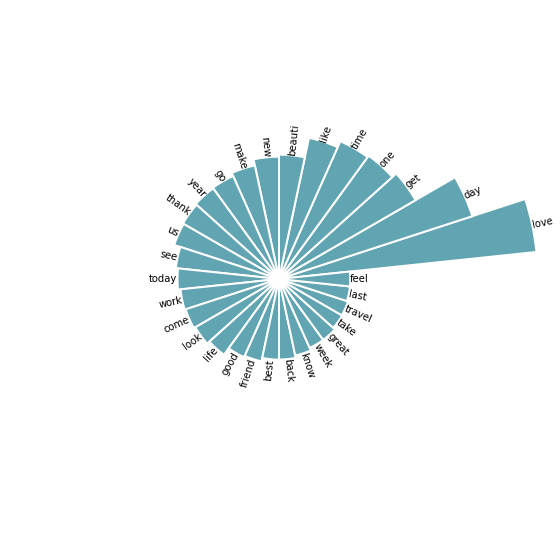

In [34]:
#Circular barplot

words = np.array(first_words)

occurrences = np.array(first_values)

# initialize the figure

plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Set the coordinates limits
upperLimit = 100
lowerLimit = 30

# Compute max 
max = occurrences.max()

slope = (max - lowerLimit) / max
heights = slope * occurrences + lowerLimit

width = 2*np.pi / 30

indexes = list(range(1, 31))
angles = [element * width for element in indexes]

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

labelPadding = 4

for bar, angle, height, label in zip(bars,angles, heights, words):

   
    rotation = np.rad2deg(angle)

    
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor")

From this analysis we can say that people like to use key words refferred to what they are posting. The majority of these words seems to be referred to positive things like 'love', 'travel', 'beauti', 'friend', 'life', key words of the social world as 'like', key words reffered to changes like 'new' ecc. Also if this text data analysis have limitations like the use of a comparation method to detect english words instead of a translation method it seems to give as meaningful answers.